# **C-HACK Tutorial 5: Data analysis and Clustering**

**Instructor**: redacted <br>
**Contact**: redacted

**Acknowlegments:** redacted would like to acknowledge the entire C-HACK hackmaster team for review and comments on the tutorial. In particular, this tutorial was reviewed by:

* redacted
* redacted



In this tutorial we will look at ways to analyze data and search for unknown groups or "clusters" in data with **clustering** methods.



---







## 5.0 Loading python packages

Lets load the packages (aka libraries) which we will need. The  [scikit-learn](https://scikit-learn.org/stable/) library contains many functions related to machine learning.


In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    

# Import scipy for some fitting functions
import scipy

# Import Scikit-Learn library for the input feature and clustering models
import sklearn         
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn import linear_model, datasets, decomposition
from sklearn.cluster import KMeans, DBSCAN

# Import datetime to convert time to a number
from datetime import datetime

# Import numpy 
import numpy as np

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})


## 5.1 Loading the NOAA dataset

Today we will work using the NOAA dataset. We need to load the file for it. Lets start by loading our google drive folder.

When you execute the cell below you will be asked to give authorization to colab to access your drive. 

In [2]:
# Sync your google drive folder
from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google.colab'

Now we can follow the instructions shown in *Evan Komp's* [video](https://youtu.be/OYwD4kBuZNw) to locate our file (here called - `cleaned_data.csv`) in google drive from google colab and save its path in a variable. 

In [3]:
your_path_to_NOAA_file="../NOAA_storm_data/cleaned_data.csv"

The dataset is in csv format, lets load it by using the  `pd.read_csv()` function in the `pandas` module



```
# Load the dataset using the read_csv() pandas function - we have to indicate that
# the index of each row is in the first column
storm_df=pd.read_csv("clean_data.csv",index_col=0)
```



In [4]:
# Load the dataset using the read_csv() pandas function - we have to indicate that
# the index of each row is in the first column
storm_df=pd.read_csv(your_path_to_NOAA_file, index_col=0)

In [5]:
storm_df

,BEGIN_DATE_TIME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE
0,13-JAN-05 18:52:00,Tornado,0,0,0,0,0.0,0.0,33.7800,-82.2000
1,12-JAN-05 20:56:00,Tornado,0,0,0,0,50000.0,0.0,36.5800,-92.2800
2,12-JAN-05 21:30:00,Tornado,0,0,0,0,300000.0,0.0,36.8700,-91.9000
3,12-JAN-05 21:50:00,Tornado,0,0,0,0,100000.0,0.0,37.0200,-91.6800
4,04-JAN-05 22:35:00,Thunderstorm Wind,0,0,0,0,10000.0,0.0,32.3700,-102.9000
...,...,...,...,...,...,...,...,...,...,...
33628,10-OCT-18 17:45:00,Waterspout,0,0,0,0,0.0,0.0,27.6300,-82.6500
33629,10-OCT-18 17:30:00,Waterspout,0,0,0,0,0.0,0.0,27.3100,-82.5900
33630,15-SEP-18 14:16:00,Flash Flood,0,0,0,0,10000.0,0.0,34.7665,-79.1530
33631,15-SEP-18 14:42:00,Flash Flood,0,0,0,0,10000.0,0.0,34.6909,-78.8998


## 5.2 Data analysis

Data analysis is a broad term which covers methods to inspect data and understand its properties. Here we will cover the concepts of distribution, mean, standard deviation and variance.


### 5.2.1 Cleaning the data

It is good practice to check the numbers in your data. For examples sometimes you might see 'NaN' entries, this means "this is not a number". We want to remove these. If there are any in our dataset the `df.dropna()` function will enable use to remove them (more info [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

```
storm_df.dropna(inplace=True) # This function acts on the dataframe called storm_df
```


In [6]:
storm_df.dropna(inplace=True) # This function acts on the dataframe called storm_df

`dropna` acts directly on the `storm_df` dataframe thanks to the `inplace=True` option. It removes the `NaN` entries as we call it. Let's check that is true ...

In [7]:
storm_df

,BEGIN_DATE_TIME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE
0,13-JAN-05 18:52:00,Tornado,0,0,0,0,0.0,0.0,33.7800,-82.2000
1,12-JAN-05 20:56:00,Tornado,0,0,0,0,50000.0,0.0,36.5800,-92.2800
2,12-JAN-05 21:30:00,Tornado,0,0,0,0,300000.0,0.0,36.8700,-91.9000
3,12-JAN-05 21:50:00,Tornado,0,0,0,0,100000.0,0.0,37.0200,-91.6800
4,04-JAN-05 22:35:00,Thunderstorm Wind,0,0,0,0,10000.0,0.0,32.3700,-102.9000
...,...,...,...,...,...,...,...,...,...,...
33628,10-OCT-18 17:45:00,Waterspout,0,0,0,0,0.0,0.0,27.6300,-82.6500
33629,10-OCT-18 17:30:00,Waterspout,0,0,0,0,0.0,0.0,27.3100,-82.5900
33630,15-SEP-18 14:16:00,Flash Flood,0,0,0,0,10000.0,0.0,34.7665,-79.1530
33631,15-SEP-18 14:42:00,Flash Flood,0,0,0,0,10000.0,0.0,34.6909,-78.8998


It looks like there were no `NaN` entries. All our entries are still there. 

```
my_random = {'day':['Monday','Tuesday','Friday', 'Monday'], \
            'caffeine':[100, 90, 70, 88], 'donuts':[25, None, None , 9]}
my_random_df = pd.DataFrame(my_random)  # Create dataframe from dictionary 

my_random_df
```

In [8]:
my_random = {'day':['Monday','Tuesday','Friday', 'Monday'], \
            'caffeine':[100, 90, 70, 88], 'donuts':[25, None, None , 9]}
my_random_df = pd.DataFrame(my_random)  # Create dataframe from dictionary 

my_random_df

,day,caffeine,donuts
0,Monday,100,25.0
1,Tuesday,90,NaN
2,Friday,70,NaN
3,Monday,88,9.0


In [9]:
my_random_df.dropna(inplace=True)

In [10]:
my_random_df

,day,caffeine,donuts
0,Monday,100,25.0
3,Monday,88,9.0


Another thing to check for is **missing data**. For example, say we have the first four column values for one entry but the longitude and the latitude are missing, is it still worthwhile to keep that point? Or would it lead to our algorithms interpreting the missing information as something to learn from. If that is the case, those entries should be removed.


Also, sometimes there are **outliers**, i.e. points which are really far from the rest and don't really represent the dataset. You can read more about outliers [here](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba). We'll get back to this idea when we have gone through the concept of distributions.

### 5.2.2 Probability distribution

When we have a large set of data, such as the NOAA data we might wonder, how likely is it that a specific storm occurs? I.e. what is the *probability* that that event takes place?

We can find that probability from a so called **Probability distribution**. This type of distribution describe the likelihood of any event occuring. It can be discrete or continuous.

Let's see an example with our dataset. 

We can visualize the probability of storms at each longitude by making a histogram with the `hist()` function from `matplotlib`. It will give us a count of the number of storms per longitude. We can then divide (also known as *normalize*) by the total number of storms to get the probability.

```
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.hist(storm_df['LONGITUDE'],bins=100, color="mediumvioletred", edgecolor="white") 
ax.set_xlim([-150,0])
ax.set_xlabel("Longitude")
ax.set_ylabel("Count")
fig.show()
```

/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


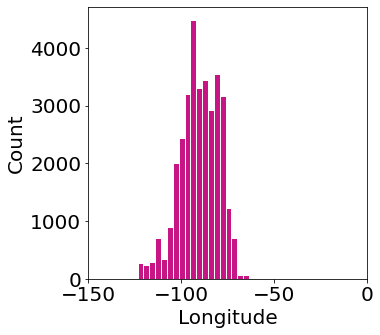

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.hist(storm_df['LONGITUDE'],bins=100, color="mediumvioletred", edgecolor="white") 
ax.set_xlim([-150,0])
ax.set_xlabel("Longitude")
ax.set_ylabel("Count")
fig.show()

Let's see what the probability distribution looks like. Here is we use the option 

```
density=True
```

in `hist()`. This corresponds to dividing by the total number of entries. 

```
Num_storms = storm_df.shape[0]

fig, ax = plt.subplots(1,1, figsize=(5,5))
_, bins, _ = ax.hist(storm_df['LONGITUDE'],bins=100, density=True, color="cornflowerblue", edgecolor="white") 
ax.set_xlim([-150,0])
ax.set_xlabel("Longitude")
ax.set_ylabel("Probability")
```


Text(0, 0.5, 'Probability')

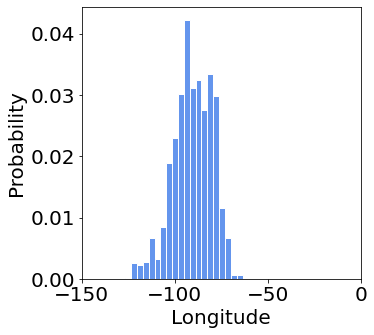

In [12]:
Num_storms = storm_df.shape[0]

fig, ax = plt.subplots(1,1, figsize=(5,5))
_, bins, _ = ax.hist(storm_df['LONGITUDE'], bins=100, density=True, color="cornflowerblue", edgecolor="white") 
ax.set_xlim([-150,0])
ax.set_xlabel("Longitude")
ax.set_ylabel("Probability")

We can also fit a curve to this histogram by using the `scipy.stats.norm.fit()` [function](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.norm.html).  This function takes an array of values in input and returns the parameters of the so called "normal" distribution function which best fit the input values. We will see more about the normal distribution in a few cells. The values which are returned are the mean (mu) and standard deviation (sigma) ... again terms we will return to soon. 

If we want to plot our fitting normal distribution function we can use another function `norm.pdf()`. This function returns the `Y` axis values of the normal distribution based on its mean and standard deviation at each point in `X`:

`Y = scipy.stats.norm.pdf(X, mu, sigma)`



```
fig, ax = plt.subplots(1,1, figsize=(5,5))
_, bins, _ = ax.hist(storm_df['LONGITUDE'],bins=100, density=True, color="cornflowerblue", edgecolor="white") 
ax.set_xlim([-150,0])
ax.set_xlabel("Longitude")
ax.set_ylabel("Probability")

print(bins)

mu, sigma = scipy.stats.norm.fit(storm_df['LONGITUDE']) # Get the values of mu and sigma by fitting our data to a normal distribution
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)   # Get the y-values of the normal distribution for each x-value in our histogram - i.e the bins
ax.plot(bins, best_fit_line, lw=3, color='navy')

fig.show()
```

[-170.8164   -167.660236 -164.504072 -161.347908 -158.191744 -155.03558
 -151.879416 -148.723252 -145.567088 -142.410924 -139.25476  -136.098596
 -132.942432 -129.786268 -126.630104 -123.47394  -120.317776 -117.161612
 -114.005448 -110.849284 -107.69312  -104.536956 -101.380792  -98.224628
  -95.068464  -91.9123    -88.756136  -85.599972  -82.443808  -79.287644
  -76.13148   -72.975316  -69.819152  -66.662988  -63.506824  -60.35066
  -57.194496  -54.038332  -50.882168  -47.726004  -44.56984   -41.413676
  -38.257512  -35.101348  -31.945184  -28.78902   -25.632856  -22.476692
  -19.320528  -16.164364  -13.0082     -9.852036   -6.695872   -3.539708
   -0.383544    2.77262     5.928784    9.084948   12.241112   15.397276
   18.55344    21.709604   24.865768   28.021932   31.178096   34.33426
   37.490424   40.646588   43.802752   46.958916   50.11508    53.271244
   56.427408   59.583572   62.739736   65.8959     69.052064   72.208228
   75.364392   78.520556   81.67672    84.832884   87.

/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


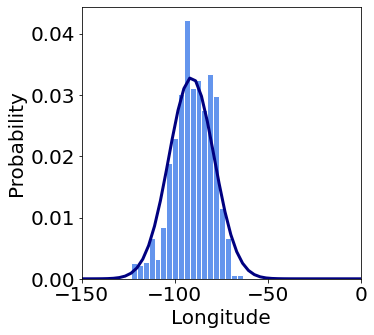

In [13]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
_, bins, _ = ax.hist(storm_df['LONGITUDE'], bins=100, density=True, color="cornflowerblue", edgecolor="white") 
ax.set_xlim([-150,0])
ax.set_xlabel("Longitude")
ax.set_ylabel("Probability")

print(bins)

mu, sigma = scipy.stats.norm.fit(storm_df['LONGITUDE']) # Get the values of mu and sigma by fitting our data to a normal distribution
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)   # Get the y-values of the normal distribution for each x-value in our histogram - i.e the bins
ax.plot(bins, best_fit_line, lw=3, color='navy')

fig.show()


A few things worth noting:


*   The area under the probability distribution curve will always be 1. Each longitude point will have a probability. When I sum all these probabilities I will get 100% i.e. 1. A point must have a longitude, no matter how likely or unlikely it is.
*   It looks like some values are more likely than others - for example it seems like very few storms occur at longitude 0 when compare to longitude -100. 
*   The distribution is not **homogeneous** some values are more likely than others. An example of a **homogeneous** distribution is the so called *uniform* distribution ... it looks like this:



#### 5.2.2.1 Uniform distribution

```
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(np.random.uniform(-5,5,10000000), density=1, color='bisque', edgecolor='orange')
ax.set_xlabel('x Value')
ax.set_ylabel('p(x) Probability')
ax.set_title('Uniform distribution')
fig.show()
```

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(np.random.uniform(-5,5,10000000), bins=50, density=1, color='bisque', edgecolor='orange')
ax.set_xlabel('x Value')
ax.set_ylabel('p(x) Probability')
ax.set_title('Uniform distribution')
fig.show()

Here we used the numpy `random.uniform()` function. It takes in input the min and max of the X range and the number of X values we want to extract from a uniform distribution. It then returns the position of each of these points based on how likely they are. They are all equally likely! In the limit of infinite points our histogram becomes flat.

#### 5.2.2.2 Normal distribution

We previously introduced a well known type of distribution the *Normal* or *Gaussian* distribution also known as the Bell curve. We used this curve to fit the data in the blue histogram a few cells above. 



/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


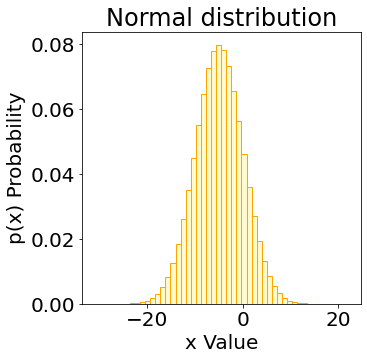

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(np.random.normal(-5,5,10000000), bins=50, density=1, color='lemonchiffon', edgecolor='orange')
ax.set_xlabel('x Value')
ax.set_ylabel('p(x) Probability')
ax.set_title('Normal distribution')
fig.show()

5.2.2.3 The NOAA distrubtions

```
storm_df.hist(figsize=(20,20), bins=50)
plt.show()
```

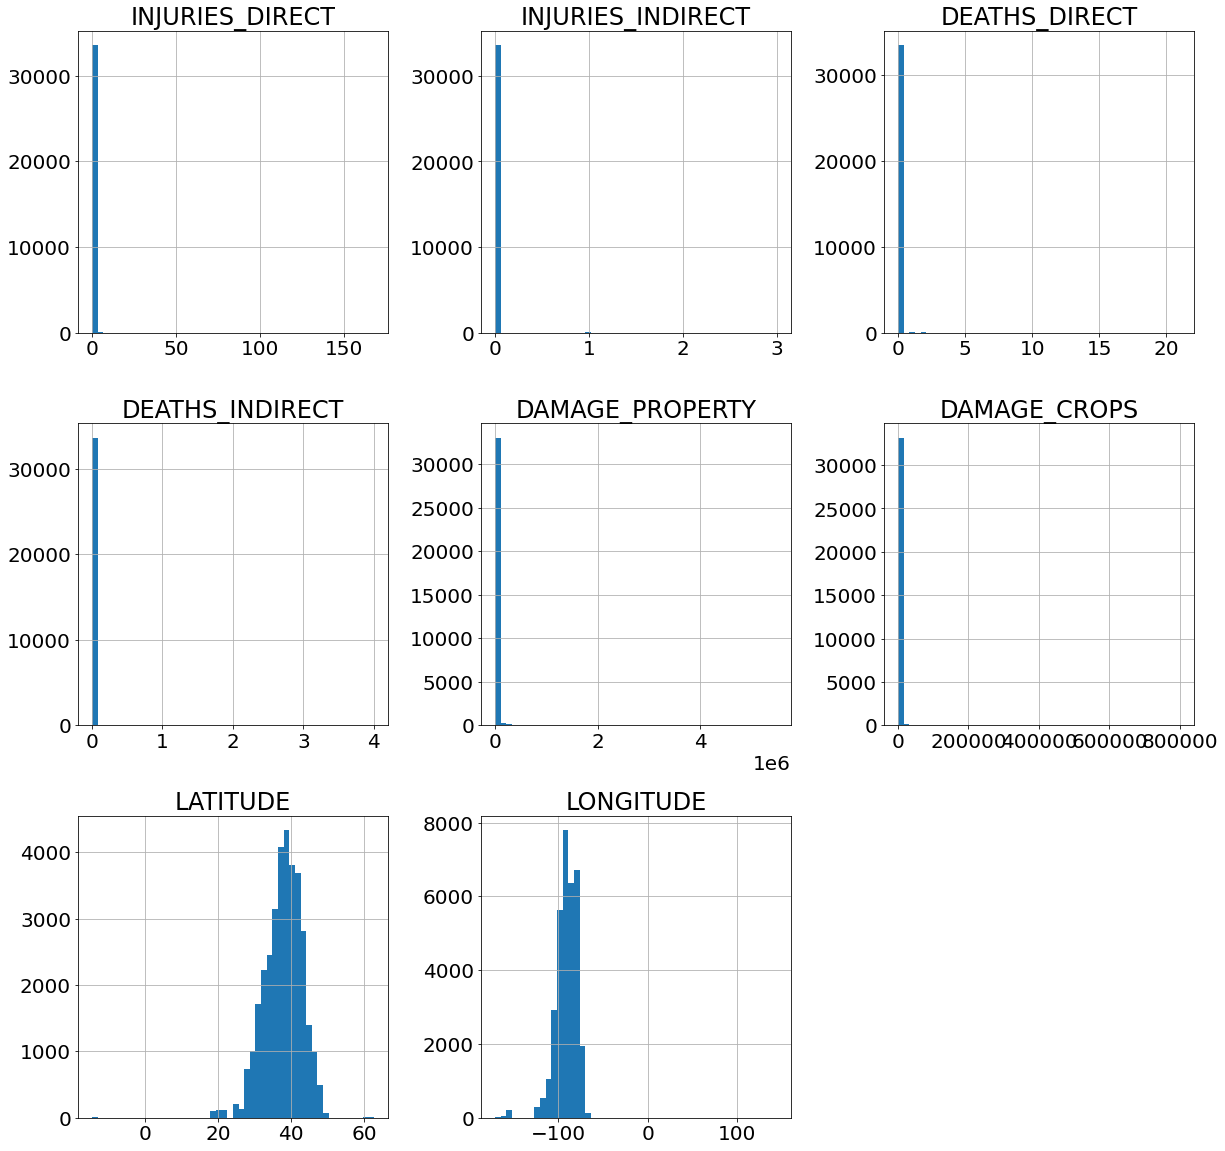

In [15]:
# Let's plot a histogram of all variables each in a separate plot
storm_df.hist(figsize=(20,20), bins=50)
plt.show()

### 5.2.3 Mean and standard deviation
We just introduced the concept of distributions. Here we will look at how to quantify the most likely value of the distribution as well as how spreadout the distribution is. Let's recall what is in our dataset 


In [16]:
storm_df.columns

Index(['BEGIN_DATE_TIME', 'EVENT_TYPE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

On average what is the longitude location, X, of the storms?



We can compute the average longitude by summing over the values of longitude from each storm $X=\left\{X_0, X_1, ..., X_N\right\}$ and normalizing by the total number of events $N$:

$$\mu_{X} = \left(X_0 + X_1 + X_2 + ... + X_N \right)/N =\sum_{i=0}^{N}\frac{X_i}{N}$$

This quantity is also known as the **mean**. We can use the `pandas` dataframe [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) function to obtain it:

```
mean_longitude = storm_df['LONGITUDE'].mean()  # mean() acts on the dataframe column `storm_df['LONGITUDE']` and return the float value of the mean longitude

mean_longitude
```

In [17]:
mean_longitude = storm_df['LONGITUDE'].mean()  # mean() acts on the dataframe column `storm_df['LONGITUDE']` and return the float value of the mean longitude

mean_longitude

-90.97366982249576

Let's plot the mean as a line at the position of the mean

```
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.hist(storm_df['LONGITUDE'],bins=100, density=True, color="cornflowerblue", edgecolor="white") # SV: SWITCH TO FIG, AX
ax.plot([mean_longitude,mean_longitude],[0,0.05],'k',lw=3, label="mean") # two identical x values and two different y values to plot a line for the mean
ax.set_xlim([-150,0])
ax.set_ylim([0,0.045])
ax.set_xlabel("Longitude")
ax.set_ylabel("Probability")
ax.legend()
```

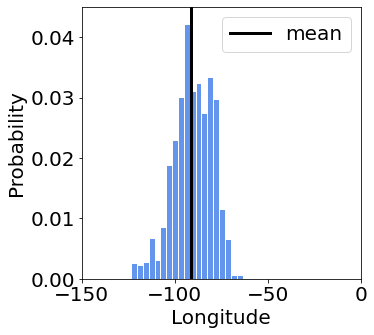

In [18]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.hist(storm_df['LONGITUDE'],bins=100, density=True, color="cornflowerblue", edgecolor="white") # SV: SWITCH TO FIG, AX
ax.plot([mean_longitude,mean_longitude],[0,0.05],'k',lw=3, label="mean") # two identical x values and two different y values to plot a line for the mean
ax.set_xlim([-150,0])
ax.set_ylim([0,0.045])
ax.set_xlabel("Longitude")
ax.set_ylabel("Probability")
ax.legend()

##### Now what is std - the **standard deviation** ?

The standard deviation quantifies the average distance of points $X=\left\{X_0, X_1, ..., X_N\right\}$ from the mean $\mu_X$:

$$\sigma_{X}=\sqrt{\frac{\sum_{i=0}^{N}(X_i-\mu_X)^2}{N-1}}$$

The square of the standard deviation is known as the **variance**.

One question we might have is: are all points close to -90.9736698224961?



From our intial histogram we might expect the standard deviation to be around the order of maybe ~15. We can think of it as some measure of the width of the histogram (distribution) ... let's compute it using the pandas dataframe [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) function

```
std_longitude = storm_df['LONGITUDE'].std() # std() acts on the 'LONGITUDE' colum of storm_df and returns the standard deviation
std_longitude
```

In [19]:
std_longitude = storm_df['LONGITUDE'].std() # std() acts on the 'LONGITUDE' colum of storm_df and returns the standard deviation
std_longitude

12.140571185332998

Let's plot the standard deviation using an *arrow* plot ([more info on arrow plots here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html))

```
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.hist(storm_df['LONGITUDE'],bins=100, density=True, color="cornflowerblue", edgecolor="white") # SV: SWITCH TO FIG, AX
ax.plot([mean_longitude,mean_longitude],[0,0.05],'k',lw=3, label="mean")
ax.arrow(mean_longitude, 0.02, std_longitude, 0, color="tomato")
ax.arrow(mean_longitude, 0.02, -std_longitude, 0, color="tomato")
ax.set_xlim([-150,0])
ax.set_ylim([0,0.045])
ax.set_xlabel("Longitude")
ax.set_ylabel("Probability")
ax.legend()
fig.show()
```

/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


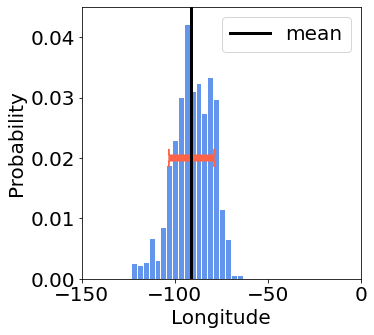

In [20]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.hist(storm_df['LONGITUDE'],bins=100, density=True, color="cornflowerblue", edgecolor="white") # SV: SWITCH TO FIG, AX
ax.plot([mean_longitude,mean_longitude],[0,0.05],'k',lw=3, label="mean")
ax.arrow(mean_longitude, 0.02, std_longitude, 0, color="tomato")
ax.arrow(mean_longitude, 0.02, -std_longitude, 0, color="tomato")
ax.set_xlim([-150,0])
ax.set_ylim([0,0.045])
ax.set_xlabel("Longitude")
ax.set_ylabel("Probability")
ax.legend()
fig.show()

We could compute the mean and standard deviation for all columns! Luckily pandas does that for us with the describe function:

```
storm_df.describe()
```



In [21]:
storm_df.describe()

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE
count,33633.000000,33633.000000,33633.000000,33633.000000,3.363300e+04,33633.000000,33633.000000,33633.000000
mean,0.020843,0.000833,0.005292,0.000654,9.669847e+03,2022.798145,37.805027,-90.973670
std,0.994340,0.037769,0.164768,0.034481,6.330757e+04,24187.988405,5.172795,12.140571
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-14.345900,-170.816400
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,34.651700,-97.410000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,38.260000,-90.328400
75%,0.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,41.460200,-82.060000
max,168.000000,3.000000,21.000000,4.000000,5.500000e+06,800000.000000,62.563400,144.800000


Here we see that every column has a different mean and standard deviation! This is important because it gives us information on the data we have. 

Now we can go back to the idea of **outliers**. Generally speaking if a point is more than +3 or -3 standard deviations from the mean it is very unlikely and can be considered as an outlier. There are better ways to identify outliers but it is definetly something you want to keep in mind.  

### 5.2.4 Scaling the data

Lastly it is often good to consider **scaling** or **normalizing** the data which will be passed to functions for machine learning. You don't need this in all cases, but say you have one column that is the amount of coffee your drink in units of molecules, so the numbers are on the order of millions. Then you also have a column that gives you the total hours you work each day. Here the numbers are on the order of 10. You don't want the algorithm to give more importance to the number of molecules with respect to the number of hours. Here are two solutions:
* You can **scale** the data from whatever the current min and max values are down to the range of [0, 1] or [-1, 1]. This means changing the x-range of values over which the data is defined. 

* You can **normalize** the data. Here the x-range of values would not change, but the y values would be normalized by the area under the curve which best fits the data.

For more information see [here](https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0). 

Let's do this for our dataset. Note that we can only do this for numerical values. We will soon see how to manage string or categorical entries.

In [22]:
storm_df.describe()

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE
count,33633.000000,33633.000000,33633.000000,33633.000000,3.363300e+04,33633.000000,33633.000000,33633.000000
mean,0.020843,0.000833,0.005292,0.000654,9.669847e+03,2022.798145,37.805027,-90.973670
std,0.994340,0.037769,0.164768,0.034481,6.330757e+04,24187.988405,5.172795,12.140571
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-14.345900,-170.816400
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,34.651700,-97.410000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,38.260000,-90.328400
75%,0.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,41.460200,-82.060000
max,168.000000,3.000000,21.000000,4.000000,5.500000e+06,800000.000000,62.563400,144.800000


```
# Select the X_data as all columns except the `'EVENT_TYPE'` from storm_df
X_data = storm_df[['INJURIES_DIRECT', 'INJURIES_INDIRECT', \
                   'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', \
                   'LATITUDE','LONGITUDE']] 
```

In [23]:
# Select the X_data as all columns except the `'EVENT_TYPE'` from storm_df
X_data = storm_df[['INJURIES_DIRECT', 'INJURIES_INDIRECT', \
                   'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', \
                   'LATITUDE','LONGITUDE']] 

type(X_data)

pandas.core.frame.DataFrame

We can scale the columns in `X_data` by using the `MinMaxScaler()` function implemented in scikit-learn ([more info here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)) and it's method the `fit_transform()` function which takes a tuple in input and returns the updated dataframe ([info on fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit_transform)). Here after applying `fit_transform()` to our data we expect it to return our data in its scaled form. Let's check. 

```
min_max_scaler = MinMaxScaler()                 # Create a MinMaxScaler() object
X_scaled = min_max_scaler.fit_transform(X_data) # Use the fit_transform() function of the MinMaxScaler() on the X_data
```


In [24]:
min_max_scaler = MinMaxScaler()                 # Create a MinMaxScaler() object
X_scaled = min_max_scaler.fit_transform(X_data) # Use the fit_transform() function of the MinMaxScaler() on the X_data
type(X_scaled)

numpy.ndarray

Let's store it back in a dataframe

```
scaled_storm_df = pd.DataFrame(X_scaled, columns= ['INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'LATITUDE', 'LONGITUDE'])
scaled_storm_df['BEGIN_DATE_TIME'] = storm_df['BEGIN_DATE_TIME'].values
scaled_storm_df['EVENT_TYPE' ] = storm_df['EVENT_TYPE'].values
```

In [25]:
# Copy scaled values
scaled_storm_df = pd.DataFrame(X_scaled, columns= ['INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'LATITUDE', 'LONGITUDE'])

# Add categorical values
scaled_storm_df['BEGIN_DATE_TIME'] = storm_df['BEGIN_DATE_TIME'].values
scaled_storm_df['EVENT_TYPE' ] = storm_df['EVENT_TYPE'].values


In [26]:
scaled_storm_df.describe()


,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE
count,33633.000000,33633.000000,33633.000000,33633.000000,33633.000000,33633.000000,33633.000000,33633.000000
mean,0.000124,0.000278,0.000252,0.000164,0.001758,0.002528,0.678084,0.252974
std,0.005919,0.012590,0.007846,0.008620,0.011510,0.030235,0.067258,0.038466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.637083,0.232581
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.683999,0.255018
75%,0.000000,0.000000,0.000000,0.000000,0.000182,0.000000,0.725609,0.281216
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.2.5 One hot encoding: from categories "strings" to numbers

As humans it is easy to understand both text and numbers. However for computers, we need to transform our categories (for example the storm type) to numbers so that it can understand how to process that information.

In machine learning, one way to do this is with One Hot Encoding. 


Let's see how One Hot Encoding works on a test dataframe

```
my_cakes = {'type':['red_velvet','tiramisu','key_lime_pie', 'brownies'], \
            'sweetness':[100, 90.5, 70.4, 25.0], 'slices per day':[25, 33, 11, 9]}
cakes_df = pd.DataFrame(my_cakes)  # Create dataframe from dictionary 
```

In [27]:
my_cakes = {'type':['red_velvet','tiramisu','key_lime_pie', 'brownies'], \
            'sweetness':[100, 90.5, 70.4, 25.0], 'slices per day':[25, 33, 11, 9]}
cakes_df = pd.DataFrame(my_cakes)  # Create dataframe from dictionary 

In [28]:
cakes_df

,type,sweetness,slices per day
0,red_velvet,100.0,25
1,tiramisu,90.5,33
2,key_lime_pie,70.4,11
3,brownies,25.0,9


We can use the scikit-learn `OneHotEncoder()` function (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)). 

First we create a `OneHotEncoder()` object

```
cake_encoder = OneHotEncoder()
```


In [29]:
cake_encoder = OneHotEncoder()

Next we reshape the X values which we want to transform using one hot encoding. Here out only categorical values are in the `type` column. We select those and reshape the array (otherwise the one hot encoding functions will complain). 

```
X = cakes_df['type'].values.reshape(-1,1)
```

In [30]:
X = cakes_df['type'].values.reshape(-1,1)

Now we call the  `cake_encoder.fit_transform()` function which transforms our `X` categorical values to one hot encoded values based on the fact that there are 4 unique values: `red_velvet`, `tiramisu`, `key_lime_pie` and `brownies`. Our one hot encoded values will be of size 4 rows x 4 columns.

```
cake_encoder.fit_transform(X)
```

In [31]:
cake_encoder.fit_transform(X)

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

This output has to be transformed back to an array and stored in out dataframe while using our new one hot encoded labels which can be obtained using the command

```
cake_encoder.get_feature_names_out()
```

In [38]:
cake_encoder.get_feature_names()

array(['x0_brownies', 'x0_key_lime_pie', 'x0_red_velvet', 'x0_tiramisu'],
      dtype=object)

```
# set new columns with cake type and binary one hot encoding
cakes_df[cake_encoder.get_feature_names_out()] = cake_encoder.fit_transform(X).toarray()
cakes_df.drop('type', axis=1, inplace=True)
```

In [39]:
# set new columns with cake type and binary one hot encoding
cakes_df[cake_encoder.get_feature_names()] = cake_encoder.fit_transform(X).toarray()
cakes_df.drop('type', axis=1, inplace=True)

In [40]:
cakes_df

,sweetness,slices per day,x0_brownies,x0_key_lime_pie,x0_red_velvet,x0_tiramisu
0,100.0,25,0.0,0.0,1.0,0.0
1,90.5,33,0.0,0.0,0.0,1.0
2,70.4,11,0.0,1.0,0.0,0.0
3,25.0,9,1.0,0.0,0.0,0.0


If we need to recall the original unique categories, we can get them using the command

```
cake_encoder.categories_
```

In [41]:
cake_encoder.categories_

[array(['brownies', 'key_lime_pie', 'red_velvet', 'tiramisu'], dtype=object)]

### 5.2.6 Dimensionality reduction - Principle component analysis (PCA)

Now that's a lot of fancy words combined. What are we talking about? Let's think of our data, do we really need all 9 columns to define a storm? Do we need the longitude, the latitude, the number of direct and indirect injuries and so on to describe it? Or ... is it possible that these values are correlated, i.e. contain similar information. If that is the case, perhaps there are some "hidden variables" i.e. a smaller subset of *principle components* that represent what is in those columns.

For example, let's say I had a table with X columns that contained: cheesecake, apple pie, red velvet cake, iceberg lettuce and romaine lettuce as foods that I eat and was trying to figure out how these foods connect to the amount of energy I have. I might not need to know about all 5 columns and might be able to define two principal components: cake and lettuce, which actually somehow contain the information of the 5 columns. All of the desserts provide me with a high amount of calories and low fiber. On the other hand, lettuce is low calorie and high fiber, so we may be able to define two uncorrelated variables that capture all 5 of the original variables.

Advantages of this smaller "lower dimensional" description include:

- reducing the computational power and time needed when looking at clustering data; avoiding the so called "curse of dimensionality"
- avoiding using redundant information. If it is enough for us to know that red velvet is a dessert why specify that it is red velvet cake?
- visualizing our data (its hard to understand a plot as a function of 5 variables - 5 dimensions)

One method that reduces dimensionality is called Principal Component Analysis (PCA). We will not go into the math of it, have a look at the wikipedia reference at the bottom of the notebook if you are curious. We will only look at how to use it on our dataset.

In [42]:
storm_df.columns


Index(['BEGIN_DATE_TIME', 'EVENT_TYPE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [43]:
storm_df.shape

(33633, 10)

Let's say we want to visualize all our storm dataset as a function of 2 or maybe 3 variables instead of 10, i.e. with a 2D or 3D plot.

We need to convert our 'BEGIN_DATE_TIME' to a number. Here it is hard to think of time as a category, and it makes much more sense to think of it as a continuous number. As you saw yesterday, Pandas has a function [`pd.to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) that will convert the string dates to numbers. Here I will save the month. Let's also drop the 'EVENT_TYPE' from the dataset, we will use it to see how we can represent our data using our principal components.

To make things faster we will start by selecting a subset of points from our total dataset using the [`sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) function which randomly samples a number of rows from the dataframe and returns them in a dataframe format. Here we sample 5000. 

```
# sample a smaller set of data
storm_df_small = storm_df.sample(5000)
```

In [44]:
# sample a smaller set of data
storm_df_small = storm_df.sample(5000)

Now we will remove the 'EVENT_TYPE' column from the dataframe using the `drop()` function (more info on `drop()` [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)) 

```
# remove the EVENT_TYPE column from the dataframe
y = storm_df_small['EVENT_TYPE']
storm_df_small.drop('EVENT_TYPE', axis=1, inplace=True) # inplace=True guarantees the column is actually removed

```

In [45]:
# remove the EVENT_TYPE column from the dataframe
y = storm_df_small['EVENT_TYPE']
storm_df_small.drop('EVENT_TYPE', axis=1, inplace=True) # inplace=True guarantees the column is actually removed


Now we will transform the dates to numbers with the `to_datetime()` function and save the years in a variable called `year`

```
# convert the date strings to numbers
datetimes = pd.to_datetime(storm_df_small['BEGIN_DATE_TIME'])
```

In [46]:
# convert the date strings to numbers
datetimes = pd.to_datetime(storm_df_small['BEGIN_DATE_TIME'])


```
# store the new date values in storm_df_small
new_times = []                    #  Create an empty list
for d in datetimes:
  new_times.append(d.timestamp()) # Get the timestamp() and append it to our list
  
storm_df_small['BEGIN_DATE_TIME'] = new_times  # Replace the values in our pandas dataframe with these numbers

# save the years in a separate list 
years = []
for d in datetimes:
  years.append(d.year)
```

In [47]:
# store the new date values in storm_df_small
new_times = []                    #  Create an empty list
for d in datetimes:
  new_times.append(d.timestamp()) # Get the timestamp() and append it to our list
  
storm_df_small['BEGIN_DATE_TIME'] = new_times  # Replace the values in our pandas dataframe with these numbers

# save the years in a separate list 
years = []
for d in datetimes:
  years.append(d.year)


In our dataframe we only have numbers now! Let's check

In [48]:
storm_df_small

,BEGIN_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE
23039,1.528566e+09,0,0,0,0,1000.0,0.0,39.4400,-83.8300
17497,1.537439e+09,0,0,0,0,0.0,0.0,43.5710,-96.8727
31652,1.539294e+09,0,0,0,0,0.0,0.0,36.9107,-78.5242
10552,1.529442e+09,0,0,0,0,0.0,0.0,38.4800,-100.9000
22932,1.530028e+09,0,0,0,0,0.0,0.0,37.3800,-89.6700
...,...,...,...,...,...,...,...,...,...
22330,1.533950e+09,0,0,0,0,0.0,0.0,35.3306,-79.4031
19574,1.532123e+09,0,0,0,0,0.0,0.0,37.2300,-85.5300
23220,1.529844e+09,0,0,0,0,2000.0,0.0,41.2100,-101.6600
24898,1.529005e+09,0,0,0,0,4000.0,0.0,37.8800,-89.5000


Now we can scale the data just like we did before with the `MinMaxScaler()` function

```
# scale the data
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(storm_df_small.values)
storm_df_small = pd.DataFrame(data=X_scaled, columns=storm_df_small.columns)
```

In [49]:
# scale the data
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(storm_df_small.values)
storm_df_small = pd.DataFrame(data=X_scaled, columns=storm_df_small.columns)

In [50]:
storm_df_small.describe()

,BEGIN_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.881685,0.000507,0.00060,0.002000,0.00060,0.001774,0.004720,0.684637,0.757887
std,0.264929,0.015171,0.02449,0.034587,0.02449,0.016238,0.049077,0.068007,0.118060
min,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.952636,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.644532,0.698002
50%,0.962374,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.690820,0.763585
75%,0.972174,0.000000,0.00000,0.000000,0.00000,0.000182,0.000000,0.732213,0.842347
max,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


We see that `EVENT_TYPE` has been removed, and `BEGIN_DATE_TIME` is now a number and all variables have been scaled between 0 and 1.

Time to search for some principal components! We are going to try to reduce everything to a 2D plot, so we want to find 2 *principal components*.

First will use the scikit-learn `decomposition.PCA()` function (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). This function creates a PCA model object based on the number of components you desire. 

```
pca = decomposition.PCA(n_components=2)
```


In [51]:
pca = decomposition.PCA(n_components=2)

Now, with the `pca.fit` function ([info](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit)), we will fit our PCA model to our data.


```
pca.fit(storm_df_small)
```

In [52]:
pca.fit(storm_df_small)

PCA(n_components=2)

After fitting to our data, we can used the `pca.transform` function ([info](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform)) to extract the principalComponents from our data. Here we are transforming the data in the 9 columns into 2 principal component columns

```
principalComponents = pca.transform(storm_df_small)
```

In [53]:
principalComponents = pca.transform(storm_df_small)

In [54]:
print(principalComponents)

[[-0.08007645 -0.06930521]
 [-0.09584772  0.05022558]
 [-0.10625774 -0.11598207]
 ...
 [-0.07763665  0.0980019 ]
 [-0.07969038 -0.01357385]
 [-0.05484915 -0.2232929 ]]


OK let's save these new components into a dataframe and add our `EVENT_TYPE` values we had dropped.

```
principal_df = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])

principal_df['EVENT_TYPE'] = y.values
```

In [55]:
principal_df = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])

principal_df['EVENT_TYPE'] = y.values

In [56]:
principal_df

,PCA 1,PCA 2,EVENT_TYPE
0,-0.080076,-0.069305,Thunderstorm Wind
1,-0.095848,0.050226,Flood
2,-0.106258,-0.115982,Flood
3,-0.077351,0.094007,Heavy Rain
4,-0.082034,-0.011296,Hail
...,...,...,...
4995,-0.094142,-0.106105,Thunderstorm Wind
4996,-0.087979,-0.050298,Hail
4997,-0.077637,0.098002,Thunderstorm Wind
4998,-0.079690,-0.013574,Thunderstorm Wind


Ok let's see how this looks on a graph

```
# Create a list of colors of the same length as the number of targets
targets = principal_df.EVENT_TYPE.unique()
N = len(targets)
colors = [cm.gist_ncar(i) for i in np.linspace(0, 1, N)]

# Create our figure
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_facecolor('midnightblue')
for i, color in enumerate(colors):
    # Select entries which match each storm type
    indicesToKeep = principal_df['EVENT_TYPE'] == targets[i]
    # Make a scatter plot of a different color for each storm type
    ax.scatter(principal_df.loc[indicesToKeep, 'PCA 1']
               , principal_df.loc[indicesToKeep, 'PCA 2']
               , color = color, alpha = 1, s = 15)
    
ax.legend(targets, loc="center right", bbox_to_anchor=(2.3,0.5), fontsize=18)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.grid()
fig.show()
```

/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


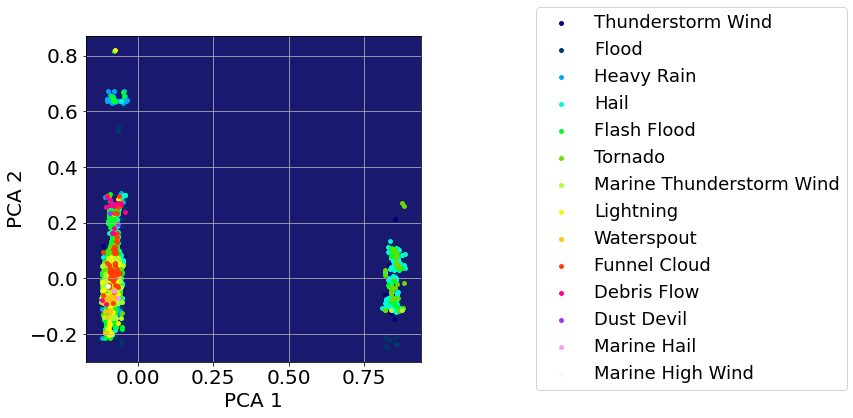

In [57]:
# Create a list of colors of the same length as the number of targets
targets = principal_df.EVENT_TYPE.unique()
N = len(targets)
colors = [cm.gist_ncar(i) for i in np.linspace(0, 1, N)]

# Create our figure
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_facecolor('midnightblue')
for i, color in enumerate(colors):
    # Select entries which match each storm type
    indicesToKeep = principal_df['EVENT_TYPE'] == targets[i]
    # Make a scatter plot of a different color for each storm type
    ax.scatter(principal_df.loc[indicesToKeep, 'PCA 1']
               , principal_df.loc[indicesToKeep, 'PCA 2']
               , color = color, alpha = 1, s = 15)
    
ax.legend(targets, loc="center right", bbox_to_anchor=(2.3,0.5), fontsize=18)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.grid()
fig.show()

Interesting, we see two distinct areas in our data when using the PCAs! To know how much each PCA represents the data we can use the command:

`pca.explain_variance_ratio_` 


```
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

```

In [58]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)


explained variance ratio (first two components): [0.747648   0.14850784]


So perhaps with these two components we can describe all the storm types and we don't need the 5 initial columns. We could have tried with 3 PCA's to see whether we would gain much by adding a third principal component.

It is interesting that the first principal component seperates the data so well into two clusters. What does this principal component correspond to?

```
print("First PCA", pca.components_[0], "\n")  # access first component using pca.components_[0]
print("Absolute value", np.abs(pca.components_[0]), "\n")  # take its absolute value using numpy.abs()
print("Position of maximum value", np.argmax(np.abs(pca.components_[0])), "\n")  # find the maximum values
print('The original variable that contributes most heavily to PC #1: ',
      storm_df.columns[np.argmax(np.abs(pca.components_[0]))]) 
```

In [59]:
print("First PCA", pca.components_[0], "\n")  # access first component using pca.components_[0]
print("Absolute value", np.abs(pca.components_[0]), "\n")  # take its absolute value using numpy.abs()
print("Position of maximum value", np.argmax(np.abs(pca.components_[0])), "\n")  # find the maximum values
print('The original variable that contributes most heavily to PC #1: ',
      storm_df.columns[np.argmax(np.abs(pca.components_[0]))]) 

First PCA [-9.98985078e-01  6.67736984e-04 -7.24074974e-04  2.09844135e-04
 -5.44091560e-04  1.41361825e-03  3.17535292e-02  1.13599880e-02
 -2.98021773e-02] 

Absolute value [9.98985078e-01 6.67736984e-04 7.24074974e-04 2.09844135e-04
 5.44091560e-04 1.41361825e-03 3.17535292e-02 1.13599880e-02
 2.98021773e-02] 

Position of maximum value 0 

The original variable that contributes most heavily to PC #1:  BEGIN_DATE_TIME


The first principal component is largely determined by the date time! These two clusters we observe are likely the two years where we have data!

### 5.2.7 Correlations between variables

After using PCA, we noticed that it is possible that variables contain similar information, for instance direct injuries and direct death might be correlated and therefore we don't need information from both. Now we will look at how to measure whether variables are correlated using Pearson correlation. There are 3 cases:

- *positive correlation* if the pearson correlation coefficient value is > 0. This means that both variables change in the same direction. If one increases or decreases, so does the other.
- *negative correlation* if the pearson correlation coefficient value is < 0. This means that e.g. if one variable decreases, the other increases and vicecersa.
- *no correlation* if the pearson correlation coefficient is = 0. This means that if one variable changes, the other does not.

##### 5.2.7.1 Pearson correlation

We can get the [pearson's correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between all the input features using the `dataframe.corr()` method as implemented [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) in pandas.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/400px-Correlation_examples2.svg.png)

Fig: pearson's correlation value and corresponding scatter plot of feature-x and feature-y

```
storm_df.corr()
```

In [60]:
storm_df.corr()

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE
INJURIES_DIRECT,1.000000,0.016956,0.667189,-0.000398,0.061529,0.025317,-0.003260,-0.013346
INJURIES_INDIRECT,0.016956,1.000000,0.004070,0.250727,0.028641,-0.001713,-0.011465,-0.023154
DEATHS_DIRECT,0.667189,0.004070,1.000000,-0.000609,0.044149,0.010124,-0.012325,-0.006789
DEATHS_INDIRECT,-0.000398,0.250727,-0.000609,1.000000,0.013993,-0.001587,0.000420,-0.008887
DAMAGE_PROPERTY,0.061529,0.028641,0.044149,0.013993,1.000000,0.096155,0.009188,-0.002590
DAMAGE_CROPS,0.025317,-0.001713,0.010124,-0.001587,0.096155,1.000000,0.027054,-0.026331
LATITUDE,-0.003260,-0.011465,-0.012325,0.000420,0.009188,0.027054,1.000000,0.081668
LONGITUDE,-0.013346,-0.023154,-0.006789,-0.008887,-0.002590,-0.026331,0.081668,1.000000


So we have this raw table of pearsons correlations between each of our columns, how do we and how should we turn this into a plot?

Here I am introducing a plotting library called `seaborn` that is built on matplotlib. It has a number of tools to create plots of data interactions that would take a lot of work to create with matplotlib directly. A link to the seaborn documentation is at the end of the tutorial. Looking into the things seaborn can do may be worthwhile.

```
fig, ax = plt.subplots(1, 1, figsize = (12,10))
# here we are creating a diverging colormap, to highlight which relationships
# have a negative correlation and which have a positive one 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(storm_df.corr(), vmin=-1.0, vmax=1.0, ax=ax, cmap=cmap)
```

<AxesSubplot:>

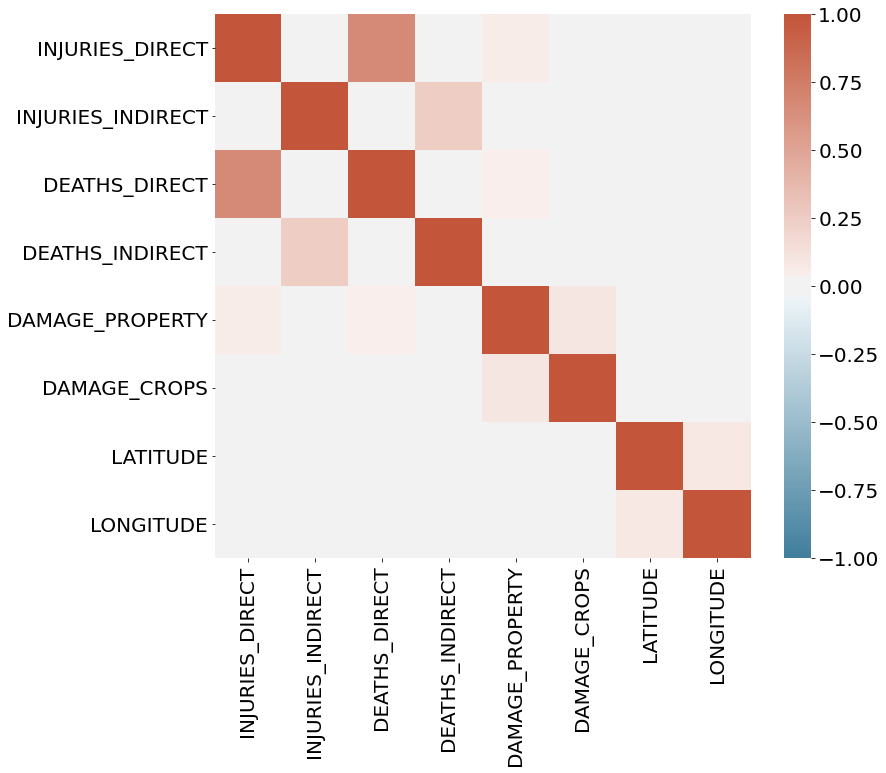

In [61]:
fig, ax = plt.subplots(1, 1, figsize = (12,10))
# here we are creating a diverging colormap, to highlight which relationships
# have a negative correlation and which have a positive one 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(storm_df.corr(), vmin=-1.0, vmax=1.0, ax=ax, cmap=cmap)

What do we notice?

There isn't much correlation in our dataset. Deaths and injuries have a significant correlation as expected, and there is a very small correlation between deaths and property damage.

## 5.3 Clustering data

Sometimes we know that data can be divided into specific groups, for instance, you each belong to either the freshman, junior, sophomore or senior year (target, Y). If we were to consider data on students, for instance, age or courses completed (input features, X), we could train an algorithm to predict a student's class. 

This process is known as classification, it is a *supervised machine learning* approach. 
- We know the *input features*, X, age and courses completed and the *output target* classes, Y, the year (freshman, junior, sophomore or senior). 
- The algorithm which predicts Y will see some of the X and Y values as it is *trained*

However, there are cases when we might believe that there are groups of similar things, but can't make a list of specific groups or "classes". For example, I might be hiking near Mount Rainier and start noticing some rocks look similar. However, I don't know much about geology and I would not be able to define classes. Here, **clustering** algorithms enable us to find this type of unkown group. Clustering belongs to the *unsupervised machine learning* area. In unsupervised learning

- We have data, X but no known output target Y
- The algorithm sees all our data and attempts to cluster it (e.g. based on similarity), i.e. it discovers unknown clusters.

### 5.3.1 Clustering with the k-means algorithm

While PCA searches for a low dimensional representation of the dataset, Clustering methods search for homogeneous subgroups among the observations. You can think of homogeneous subgroups as groups of data point where things are very similar. That could be the size of the rocks are all 1 inch in subgroup 1 and 2 inches in subgroup 2 - the clustering algorithm will make that choice. 

The **k-means algorithm** is a clustering algorithm. Here one defines a desired *number of clusters* _K_ (Watch out: not the type of cluster but only how many we think there are!) and aim to assign each observation to one of the clusters. 

![](https://i.stack.imgur.com/cIDB3.png)

The idea is that we will find points which define the center of each cluster. These are known as *centroids*. Then new data will be assigned to that cluster based on the distance from each *centroid*.

* Each observation must be placed in at least one of the clusters
* No clusters may overlap, each observation can only be placed in a single cluster 
* The goal is to minimize the variance of observations within each of the clusters (i.e. all data entries in a cluster must be similar to each other!)

To learn more about k-means see [k-means](https://scikit-learn.org/stable/modules/clustering.html#k-means) on scikit-learn.

### 5.3.2 k-means with scikit-learn 
Now we will apply k-means to our dataset. The function we will use is defined in the scikit-learn module - `KMeans()`. Let's see if we have clusters of storm types as a function of longitude and latitude.

The idea is that we choose to cluster all our scaled data, X, in it's reduced PCA representation. Recall that we had excluded the `'EVENT_TYPE'`.

```
X_df = principal_df.drop('EVENT_TYPE', axis=1)
```

In [62]:
X_df = principal_df.drop('EVENT_TYPE', axis=1)

In [63]:
X_df

,PCA 1,PCA 2
0,-0.080076,-0.069305
1,-0.095848,0.050226
2,-0.106258,-0.115982
3,-0.077351,0.094007
4,-0.082034,-0.011296
...,...,...
4995,-0.094142,-0.106105
4996,-0.087979,-0.050298
4997,-0.077637,0.098002
4998,-0.079690,-0.013574


Now we call the `KMeans()` function (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) to create a `KMeans()` object which I save in the variable `kmeans_2`. Here we have to specify the number of clusters we think might be there (this is unknown!). I choose 2.

```
kmeans_2 = KMeans(n_clusters= 2)
```

In [64]:
kmeans_2 = KMeans(n_clusters= 2)

##### *Question*: Could `n_clusters=1` ?

Now we pass all our `X_df` data to our `kmeans_2` object and ask for it to find 2 clusters by going through our data using the `fit_predict()` function (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict)). This function will return `labels` i.e. labels are the numbers assigned to each entry in `X_df` which define whether it is in the first (label=0) or second cluster (label=1).

```
labels = kmeans_2.fit_predict(X_df)

print(labels[0:10]) # Print first 10 labels - these correspond to the first 10 entries of our dataset
```

In [65]:
labels = kmeans_2.fit_predict(X_df)

print(labels[0:10]) # Print first 10 labels - these correspond to the first 10 entries of our dataset

[1 1 1 1 1 1 1 1 1 0]


Now we can find the positions of these points which are for the first and second discovered cluster as following

```
cluster_1 = principal_df[labels == 0] # Search for positions in labels where the value is 0 - those positions correspond to entries in cluster 1
cluster_2 = principal_df[labels == 1] # Search for positions in labels where the value is 1 - those positions correspond to entries in cluster 2
```

In [66]:
cluster_1 = principal_df[labels == 0] # Search for positions in labels where the value is 0 - those positions correspond to entries in cluster 1
cluster_2 = principal_df[labels == 1] # Search for positions in labels where the value is 1 - those positions correspond to entries in cluster 2

Why did that work?

In [67]:
labels == 0

array([False, False, False, ..., False, False, False])

Let's plots our clusters and the position of the centroids for each cluster. Those positions are in the `kmeans_2` objects `cluster_centers_` variable which we can access as

```
kmeans_2.cluster_centers_
```

In [68]:
kmeans_2.cluster_centers_

array([[ 8.48164405e-01, -5.66266432e-03],
       [-8.26569350e-02,  5.51848761e-04]])

```
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot(cluster_1['PCA 1'], cluster_1['PCA 2'],'ob', alpha=0.3, label='cluster 1')
ax.plot(cluster_2['PCA 1'], cluster_2['PCA 2'],'>r', alpha=0.3, label='cluster 2')
ax.plot(kmeans_2.cluster_centers_[0][0], kmeans_2.cluster_centers_[0][1], c='cornflowerblue', alpha=0.8, markeredgewidth=2, markeredgecolor='navy', marker=(5,1), markersize=20, label='centroid 1')
ax.plot(kmeans_2.cluster_centers_[1][0], kmeans_2.cluster_centers_[1][1], c='orange', alpha=0.8, markeredgewidth=2, markeredgecolor='crimson', marker=(5,1), markersize=20, label='centroid 2')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
plt.xticks(rotation = 45)
ax.legend(loc="upper right", bbox_to_anchor=(1.,0.98))
fig.show()
```

/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


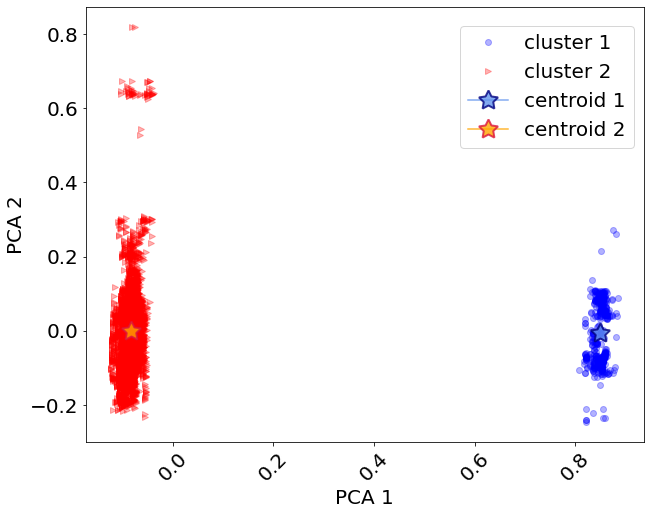

In [69]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot(cluster_1['PCA 1'], cluster_1['PCA 2'],'ob', alpha=0.3, label='cluster 1')
ax.plot(cluster_2['PCA 1'], cluster_2['PCA 2'],'>r', alpha=0.3, label='cluster 2')
ax.plot(kmeans_2.cluster_centers_[0][0], kmeans_2.cluster_centers_[0][1], c='cornflowerblue', alpha=0.8, markeredgewidth=2, markeredgecolor='navy', marker=(5,1), markersize=20, label='centroid 1')
ax.plot(kmeans_2.cluster_centers_[1][0], kmeans_2.cluster_centers_[1][1], c='orange', alpha=0.8, markeredgewidth=2, markeredgecolor='crimson', marker=(5,1), markersize=20, label='centroid 2')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
plt.xticks(rotation = 45)
ax.legend(loc="upper right", bbox_to_anchor=(1.,0.98))
fig.show()

What if we thought there were 6 clusters?

```
kmeans_6 = KMeans(n_clusters= 6)
labels_6 = kmeans_6.fit_predict(X_df)

clusters_6 = [principal_df[labels_6 == i] for i in range(6) ]
kmeans_6.cluster_centers_

fig, ax = plt.subplots(1, figsize=(10,8))
colors = [cm.viridis(i) for i in np.linspace(0, 0.9, 6)]
markers = ['o','>','<','s','d','p','^','v','.','8']
m_colors = ['plum', 'deepskyblue', 'cyan', 'darkslategrey', 'darkgreen', 'olivedrab']

for i, color in enumerate(colors):
  ax.plot(clusters_6[i]['PCA 1'], clusters_6[i]['PCA 2'], marker=markers[i], lw=0, c=color, alpha=0.3, label='cluster '+str(i))
  ax.plot(kmeans_6.cluster_centers_[i][0], kmeans_6.cluster_centers_[i][1], lw=0, c=color, alpha=1, markeredgecolor=m_colors[i], marker=(5,1), markeredgewidth=2, markersize=20, label='centroid '+str(i))
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
plt.xticks(rotation = 45)
ax.legend(loc="center right", bbox_to_anchor=(1.4,0.5))
fig.show()
```

/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


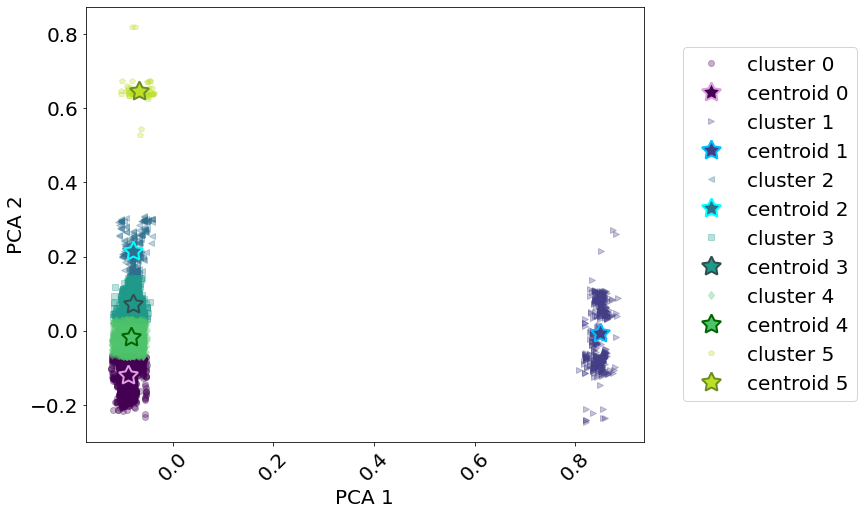

In [70]:
kmeans_6 = KMeans(n_clusters= 6)
labels_6 = kmeans_6.fit_predict(X_df)

clusters_6 = [principal_df[labels_6 == i] for i in range(6) ]
kmeans_6.cluster_centers_

fig, ax = plt.subplots(1, figsize=(10,8))
colors = [cm.viridis(i) for i in np.linspace(0, 0.9, 6)]
markers = ['o','>','<','s','d','p','^','v','.','8']
m_colors = ['plum', 'deepskyblue', 'cyan', 'darkslategrey', 'darkgreen', 'olivedrab']

for i, color in enumerate(colors):
  ax.plot(clusters_6[i]['PCA 1'], clusters_6[i]['PCA 2'], marker=markers[i], lw=0, c=color, alpha=0.3, label='cluster '+str(i))
  ax.plot(kmeans_6.cluster_centers_[i][0], kmeans_6.cluster_centers_[i][1], lw=0, c=color, alpha=1, markeredgecolor=m_colors[i], marker=(5,1), markeredgewidth=2, markersize=20, label='centroid '+str(i))
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
plt.xticks(rotation = 45)
ax.legend(loc="center right", bbox_to_anchor=(1.4,0.5))
fig.show()

Some of these are very close, how do we figure out if the results are correct when we don't know the best number of clusters?

### 5.3.3 Evaluating the accuracy of clustering

How do we find the optimal number of clusters? We can use a metric called the **silhouette coefficient** (more info [here](https://en.wikipedia.org/wiki/Silhouette_(clustering))) it is equal to

$$\text{silhouette coeff}=\frac{b-a}{max(a,b)}$$

- $a$ is the average distance to the other data points in the same cluster
- $b$ is the average nearest cluster distance (i.e. the average distance to the next closest cluster) 

With this coefficient, we can get an idea of how well our data has been assigned to the clusters

- If the value is close to +1 then clusters are well separated and the points in each cluster do not overlap.

- If the value is close to -1 then a value may have been assigned to the wrong cluster

- If the value is zero then the point is close to a cluster boundary

Let's try this for our data by using the scikit-learn `silhouette_score()` function (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)). This function takes in input `X_df` original dataframe and the `labels_` which were obtained using K-means. Note that you can use this function for any clustering algorithm. All you need is the data and assigned labels (i.e. clusters).

This function returns the value of the Silhouette score.

```
sil_score = []                                # Define an empty list
for num_clust in range(2, 25):                # Iterate in range 2 to 25 clusters as input choice 
    print("Searching for", num_clust, "clusters with k-means.")
    kmeans = KMeans(n_clusters = num_clust)   # Create kmeans clustering object for num_clust
    label = kmeans.fit_predict(X_df)          # Find the labels (0 - cluster 1, 1 - cluster 2, ...., N-1 for cluster N)
    sil_score.append(silhouette_score(X_df, kmeans.labels_))  # Compute the silhouette score and store it in the list
```

In [71]:
sil_score = []                                # Define an empty list
for num_clust in range(2, 25):                # Iterate in range 2 to 25 clusters as input choice 
    print("Searching for", num_clust, "clusters with k-means.")
    kmeans = KMeans(n_clusters = num_clust)   # Create kmeans clustering object for num_clust
    label = kmeans.fit_predict(X_df)          # Find the labels (0 - cluster 1, 1 - cluster 2, ...., N-1 for cluster N)
    sil_score.append(silhouette_score(X_df, kmeans.labels_))  # Compute the silhouette score and store it in the list


Searching for 2 clusters with k-means.
Searching for 3 clusters with k-means.
Searching for 4 clusters with k-means.
Searching for 5 clusters with k-means.
Searching for 6 clusters with k-means.
Searching for 7 clusters with k-means.
Searching for 8 clusters with k-means.
Searching for 9 clusters with k-means.
Searching for 10 clusters with k-means.
Searching for 11 clusters with k-means.
Searching for 12 clusters with k-means.
Searching for 13 clusters with k-means.
Searching for 14 clusters with k-means.
Searching for 15 clusters with k-means.
Searching for 16 clusters with k-means.
Searching for 17 clusters with k-means.
Searching for 18 clusters with k-means.
Searching for 19 clusters with k-means.
Searching for 20 clusters with k-means.
Searching for 21 clusters with k-means.
Searching for 22 clusters with k-means.
Searching for 23 clusters with k-means.
Searching for 24 clusters with k-means.


Let's see what this looks like graphically

```
ks = np.linspace(2, 25, len(sil_score))
fig, ax = plt.subplots(1, figsize=(5,4))
ax.plot(ks, sil_score, '--o', color='darkorchid')
ax.set_xlabel('$k$')
ax.set_ylabel('Silhouette score')
fig.show()
```

/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


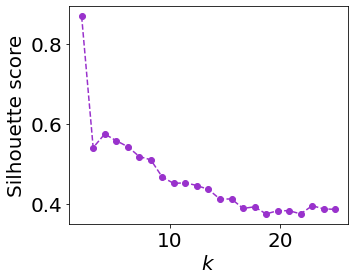

In [72]:
ks = np.linspace(2, 25, len(sil_score))
fig, ax = plt.subplots(1, figsize=(5,4))
ax.plot(ks, sil_score, '--o', color='darkorchid')
ax.set_xlabel('$k$')
ax.set_ylabel('Silhouette score')
fig.show()

In [73]:
print("Maximum silhouette score", max(sil_score))

Maximum silhouette score 0.8693565184510049


Now we see that for this dataset it is not a good idea to keep increasing the number of clusters. That can change depending on the data you have.

##### *Question*: What do you think will happen is we increase $k$ to match the number of points we have?

### 5.3.4 Other clustering algorithms

There are many other clustering algorithms, for instance DBSCAN, agglomerative clustering and gaussian mixtures. Have a look on the scikit-learn page [here](https://scikit-learn.org/stable/modules/clustering.html) for more information. 

# Breakout Room





## Exercise 1: Removing outliers & clustering

Using the definition of standard deviation remove outliers from the storm dataset and carry out clustering with k-means. 


*   Does the Silhouette metric change?
*   Does the optimal number of clusters changes?


Suggestions: 

* Keep all `BEGIN_DATA_TIME` and `LONGITUDE` and `LATITUDE` entries. 
* Make sure your data is scaled. (Note: usually you want to remove outliers prior to scaling! You can do it the other way around here for shortness of time)
* Use PCA to reduce dimensionality to 2
* Use KMeans to cluster between 2 and 25 clusters
* Compare to your previous Silhouette score plot

### B1.1 Compute std and mean

Compute the standard deviation and average for each column using the `std()` and `mean()` functions. Note - data is already scaled.

In [74]:
storm_df_small.describe()

,BEGIN_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.881685,0.000507,0.00060,0.002000,0.00060,0.001774,0.004720,0.684637,0.757887
std,0.264929,0.015171,0.02449,0.034587,0.02449,0.016238,0.049077,0.068007,0.118060
min,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.952636,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.644532,0.698002
50%,0.962374,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.690820,0.763585
75%,0.972174,0.000000,0.00000,0.000000,0.00000,0.000182,0.000000,0.732213,0.842347
max,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [75]:
y_storms = y.values

In [76]:
standard_devs = storm_df_small.std()
standard_devs

BEGIN_DATE_TIME      0.264929
INJURIES_DIRECT      0.015171
INJURIES_INDIRECT    0.024490
DEATHS_DIRECT        0.034587
DEATHS_INDIRECT      0.024490
DAMAGE_PROPERTY      0.016238
DAMAGE_CROPS         0.049077
LATITUDE             0.068007
LONGITUDE            0.118060
dtype: float64

In [77]:
averages = storm_df_small.mean()
averages

BEGIN_DATE_TIME      0.881685
INJURIES_DIRECT      0.000507
INJURIES_INDIRECT    0.000600
DEATHS_DIRECT        0.002000
DEATHS_INDIRECT      0.000600
DAMAGE_PROPERTY      0.001774
DAMAGE_CROPS         0.004720
LATITUDE             0.684637
LONGITUDE            0.757887
dtype: float64

### B1.2 Remove outliers from columns based on standard dev.
In the dataset, we decide to drop values which are beyond 3 std from the mean for all columns except the `LATITUDE`, `LONGITUDE` and `BEGIN_DATE_TIME`. 




We want to remove elements from the second to the 7th column listed in that list.

In [78]:
clean_df = storm_df_small.copy()
N_std = 3
dropped = storm_df_small.count()[0] - clean_df.count()[0]
total_dropped = 0

for col_label in clean_df.columns.values.tolist()[1:-2]:
    print('Dropping outliers from', col_label)
    clean_df.drop(clean_df[abs(clean_df[col_label]-averages[col_label]) > N_std*standard_devs[col_label]].index, inplace = True)
print('Total dropped:', storm_df_small.count()[0] - clean_df.count()[0])


Dropping outliers from INJURIES_DIRECT
Dropping outliers from INJURIES_INDIRECT
Dropping outliers from DEATHS_DIRECT
Dropping outliers from DEATHS_INDIRECT
Dropping outliers from DAMAGE_PROPERTY
Dropping outliers from DAMAGE_CROPS
Total dropped: 104


In [79]:
clean_df
y_clean = []
for ind in clean_df.index:
  y_clean.append(y_storms[ind])


In [80]:
len(y_clean)

4896

### B1.3 Use PCA to reduce to 2 dimensions
Let's go back to clustering this new dataset with k-means and compute the Silhouette score.

In [81]:
# reduce dimensionality
pca_drop = decomposition.PCA(n_components=2)
pca_drop.fit(clean_df)
principalComponents_drop = pca.transform(clean_df)


# save in a dataframe
principal_df_drop = pd.DataFrame(data = principalComponents_drop, columns = ['PCA 1', 'PCA 2'])
principal_df_drop['EVENT_TYPE'] = y_clean

principal_df_drop

,PCA 1,PCA 2,EVENT_TYPE
0,-0.080076,-0.069305,Thunderstorm Wind
1,-0.095848,0.050226,Flood
2,-0.106258,-0.115982,Flood
3,-0.077351,0.094007,Heavy Rain
4,-0.082034,-0.011296,Hail
...,...,...,...
4891,-0.094142,-0.106105,Thunderstorm Wind
4892,-0.087979,-0.050298,Hail
4893,-0.077637,0.098002,Thunderstorm Wind
4894,-0.079690,-0.013574,Thunderstorm Wind


In [82]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca_drop.explained_variance_ratio_)
)


explained variance ratio (first two components): [0.78158318 0.16447314]


### B1.4 Use KMeans to cluster between 2 and 25 clusters

In [83]:
X_df_drop = principal_df_drop.drop('EVENT_TYPE', axis=1)
sil_score_drop = []                                   # Define an empty list
for num_clust in range(2, 25):                # Iterate in range 2 to 25 clusters as input choice 
    print("Searching for", num_clust, "clusters with k-means.")
    kmeans = KMeans(n_clusters = num_clust)   # Create kmeans clustering object for num_clust
    label = kmeans.fit_predict(X_df_drop)          # Find the labels (0 - cluster 1, 1 - cluster 2, ...., N-1 for cluster N)
    sil_score_drop.append(silhouette_score(X_df_drop, kmeans.labels_))  

Searching for 2 clusters with k-means.
Searching for 3 clusters with k-means.
Searching for 4 clusters with k-means.
Searching for 5 clusters with k-means.
Searching for 6 clusters with k-means.
Searching for 7 clusters with k-means.
Searching for 8 clusters with k-means.
Searching for 9 clusters with k-means.
Searching for 10 clusters with k-means.
Searching for 11 clusters with k-means.
Searching for 12 clusters with k-means.
Searching for 13 clusters with k-means.
Searching for 14 clusters with k-means.
Searching for 15 clusters with k-means.
Searching for 16 clusters with k-means.
Searching for 17 clusters with k-means.
Searching for 18 clusters with k-means.
Searching for 19 clusters with k-means.
Searching for 20 clusters with k-means.
Searching for 21 clusters with k-means.
Searching for 22 clusters with k-means.
Searching for 23 clusters with k-means.
Searching for 24 clusters with k-means.


### B1.5 Compare the silhouette score to the one you had prior to dropping outliers

/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


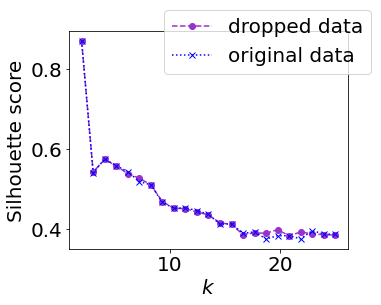

In [84]:
ks_drop = np.linspace(2, 25, len(sil_score_drop))
fig, ax = plt.subplots(1, figsize=(5,4))
ax.plot(ks_drop, sil_score_drop, '--o', color='darkorchid', label='dropped data')
ax.plot(ks, sil_score, ':x', color='blue', label = 'original data')
ax.set_xlabel('$k$')
ax.set_ylabel('Silhouette score')
fig.legend(loc='upper right')
fig.show()

In [85]:
print("Index of max sil score with drop:", sil_score_drop.index(max(sil_score_drop)), "Value:",  max(sil_score_drop))
print("Index of max sil score without drop:", sil_score.index(max(sil_score)),"Value:",  max(sil_score))

Index of max sil score with drop: 0 Value: 0.8690132644729807
Index of max sil score without drop: 0 Value: 0.8693565184510049


We see that the silhouette score does not change significantly and the optimal number of clusters remain the same. This most likely means that the outliers were not biasing our algorithm. Try it while also including longitude and latitude outliers.

## Exercise 2: Clustering with DBSCAN

Have a look at the scikit-learn function to cluster using the [DBSCAN method](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) which is implemented in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). You can find an example problem [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

Here you will not need to set a fixed number of clusters. Use all the data, include the onehotencoded `EVENT_TYPE` in your x-values. 
* Add the `EVENT_TYPE` to x-values by using onehotencoding
* Compute the number of clusters, NC, with DBSCAN
* Plot these in 3D
* Compare to results you would get is you used k-means with k=NC; does the silhouette score differ?
* According to you what is the advantage respect to k-means clustering?
* What do the clusters mean?

#### B2.1 Add the `EVENT_TYPE` values in the onehotencoded representation

In [86]:
storm_encoder = OneHotEncoder()        # Add the event_type to X using OneHotEncoding
storm_df_all = storm_df_small.copy() 
storm_df_all[storm_encoder.get_feature_names()] = storm_encoder.fit_transform(y_storms.reshape(-1,1)).toarray()

storm_df_all.describe()

,BEGIN_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,LATITUDE,LONGITUDE,x0_Debris Flow,...,x0_Funnel Cloud,x0_Hail,x0_Heavy Rain,x0_Lightning,x0_Marine Hail,x0_Marine High Wind,x0_Marine Thunderstorm Wind,x0_Thunderstorm Wind,x0_Tornado,x0_Waterspout
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.881685,0.000507,0.00060,0.002000,0.00060,0.001774,0.004720,0.684637,0.757887,0.002800,...,0.011000,0.210600,0.048600,0.009800,0.000400,0.000200,0.042200,0.354400,0.034000,0.006000
std,0.264929,0.015171,0.02449,0.034587,0.02449,0.016238,0.049077,0.068007,0.118060,0.052846,...,0.104313,0.407776,0.215052,0.098519,0.019998,0.014142,0.201065,0.478379,0.181247,0.077235
min,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.952636,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.644532,0.698002,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.962374,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.690820,0.763585,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.972174,0.000000,0.00000,0.000000,0.00000,0.000182,0.000000,0.732213,0.842347,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### B2.2 Use PCA to reduce dimensionality from 24 to 3

In [87]:
# reduce dimensionality to 3 PCA components
pca_all = decomposition.PCA(n_components=3)
pca_all.fit(storm_df_all)

print(pca_all.mean_)
principalComponents_all = pca_all.transform(storm_df_all)

# save in a dataframe
principal_df_all = pd.DataFrame(data = principalComponents_all, columns = ['PCA 1', 'PCA 2', 'PCA 3'])


[8.81685056e-01 5.07142857e-04 6.00000000e-04 2.00000000e-03
 6.00000000e-04 1.77365091e-03 4.72014545e-03 6.84636726e-01
 7.57886820e-01 2.80000000e-03 4.00000000e-04 1.34200000e-01
 1.45400000e-01 1.10000000e-02 2.10600000e-01 4.86000000e-02
 9.80000000e-03 4.00000000e-04 2.00000000e-04 4.22000000e-02
 3.54400000e-01 3.40000000e-02 6.00000000e-03]


In [88]:
principal_df_all.describe()

,PCA 1,PCA 2,PCA 3
count,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.344791e-17,1.225686e-17,1.278977e-17
std,5.365701e-01,4.286249e-01,3.733594e-01
min,-6.649598e-01,-6.520443e-01,-6.349918e-01
25%,-3.215402e-01,-4.664080e-01,-5.815655e-02
50%,-2.113540e-01,1.072977e-01,-1.909943e-02
75%,6.994584e-01,1.219412e-01,3.709776e-02
max,7.091509e-01,7.880707e-01,8.058936e-01


#### B2.3 Use DBSCAN to search for clusters

Let's check we have loaded the scikit-learn `DBSCAN` function (section 5.0). We did so we can use it now ..  

In [89]:
dbscan = DBSCAN(eps=0.3, min_samples=100)
labels_db = dbscan.fit_predict(principal_df_all)

In [90]:
dbscan.labels_

array([0, 1, 1, ..., 0, 0, 1])

In [91]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_ = list(labels_db).count(-1)

In [92]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Coefficient: ", silhouette_score(principal_df_all, labels_db))

Estimated number of clusters: 5
Estimated number of noise points: 0
Silhouette Coefficient:  0.9559574361974477


### B2.4 Make a 3D plot of the DBSCAN clusters

/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


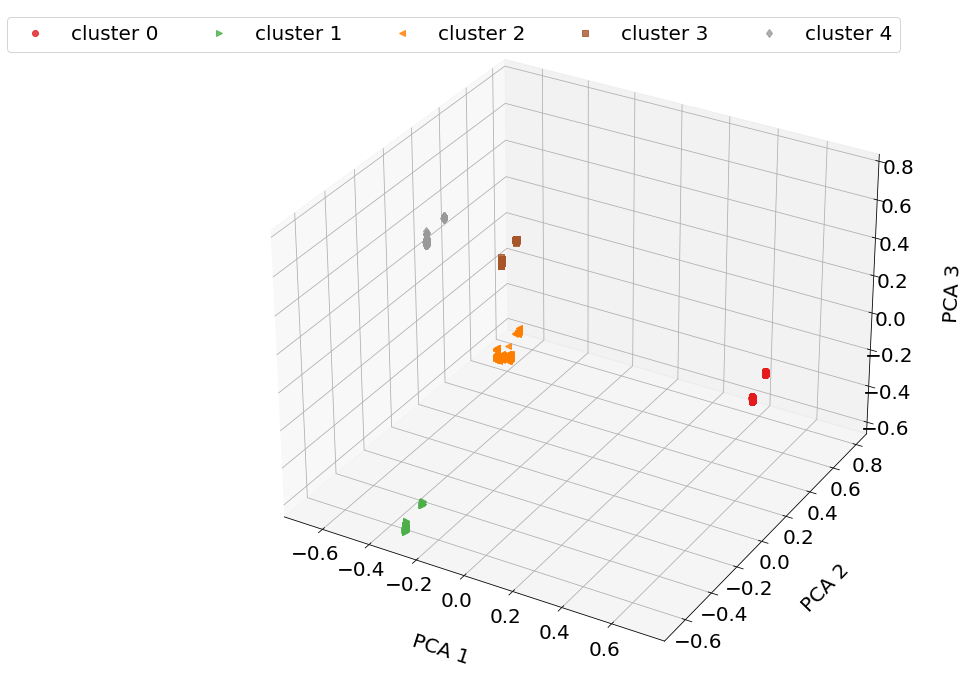

In [93]:
NC = n_clusters_
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
fig.tight_layout()
colors = [cm.Set1(i) for i in np.linspace(0, 0.9, NC)]
clusters_db = [principal_df_all[labels_db == i] for i in range(NC) ]

for i, color in enumerate(colors):
  ax.plot(clusters_db[i]['PCA 1'], clusters_db[i]['PCA 2'], clusters_db[i]['PCA 3'], 
          marker=markers[i], lw=0, c=color, alpha=0.8, label='cluster '+str(i))
 
ax.set_xlabel('\nPCA 1', linespacing=5)
ax.set_ylabel('\nPCA 2', linespacing=5)
ax.set_zlabel('\nPCA 3', linespacing=5)

ax.legend(ncol=NC)

fig.show()

### B2.5 Compare to k-means

In [94]:
kmeans = KMeans(n_clusters = n_clusters_)
labels_km = kmeans.fit_predict(principal_df_all)

print("Selected number of clusters:", n_clusters_)
print("Silhouette Coefficient: ", silhouette_score(principal_df_all, labels_km))

Selected number of clusters: 5
Silhouette Coefficient:  0.9559574361974477


Here we get the exact same Silhouette Coefficient! However, to find this number we would need to iterate over a range of possible clusters.

In [95]:
sil_score_km = []
for i in range(2,25):
  kmeans = KMeans(n_clusters = i)
  labels_km = kmeans.fit_predict(principal_df_all)
  sil_score_km.append(silhouette_score(principal_df_all, labels_km))



/opt/anaconda3/envs/plotting/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


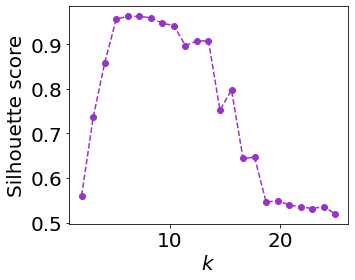

In [96]:
ks = np.linspace(2, 25, len(sil_score_km))
fig, ax = plt.subplots(1, figsize=(5,4))
ax.plot(ks, sil_score_km, '--o', color='darkorchid')

ax.set_xlabel('$k$')
ax.set_ylabel('Silhouette score')

fig.show()

### What do the clusters contain / mean?

What you would do next is look at the values of the original columns for each cluster to understand what is being clustered.


In [97]:
original_db_clusters = [storm_df_all[labels_db == i] for i in range(NC) ]

mean_db_df = pd.DataFrame({ 'COLUMN': original_db_clusters[0].mean().index, 'Cluster 1': original_db_clusters[0].mean().values, 
                           'Cluster 2': original_db_clusters[1].mean().values, 
                           'Cluster 3': original_db_clusters[2].mean().values,
                           'Cluster 4': original_db_clusters[3].mean().values, 
                           'Cluster 5': original_db_clusters[4].mean().values})

In [98]:
mean_db_df

,COLUMN,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,BEGIN_DATE_TIME,0.885292,0.944278,0.927934,0.774631,0.918787
1,INJURIES_DIRECT,0.000383,0.000000,0.002344,0.000000,0.000053
2,INJURIES_INDIRECT,0.000564,0.000000,0.001287,0.000000,0.001490
3,DEATHS_DIRECT,0.000564,0.004814,0.002574,0.000000,0.005216
4,DEATHS_INDIRECT,0.000000,0.001376,0.002574,0.000000,0.000000
5,DAMAGE_PROPERTY,0.001993,0.001445,0.002613,0.000564,0.002478
6,DAMAGE_CROPS,0.001420,0.008684,0.004668,0.008109,0.003883
7,LATITUDE,0.686972,0.706346,0.650423,0.697693,0.674078
8,LONGITUDE,0.774668,0.797594,0.740179,0.709033,0.767721
9,x0_Debris Flow,0.000000,0.000000,0.018018,0.000000,0.000000


We see that BEGIN_DATE_TIME, LONGITUDE and LATITUDE have similar means, on the other hand it looks like clustering is happening based on other values, e.g. Cluster 2 has Thunderstorm Wind storms and no other type of storm. On the other hand Cluster 1 has a larger set of storms, Tornados, Waterspout, Marine Wind and Hail storms as well as Heavy Rain an Lightning etc..

<hr style="border:1px solid grey"> </hr>

# References

* **NOAA dataset**: here is the [source](https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/) of the dataset taken from the [National Oceanic and Atmospheric Administration](https://www.noaa.gov/). Only two years of data were selected for the purpose of this tutorial.  

* **Scaling** there are different ways to scale data - see https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

* **Outliers** see https://towardsdatascience.com/outlier-detection-methods-in-machine-learning-1c8b7cca6cb8

* **Principal component analysis** for more information see  https://en.wikipedia.org/wiki/Principal_component_analysis

* **Pearson correlation**
To find out more see https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

* **Clustering**
To find out more see https://en.wikipedia.org/wiki/Cluster_analysis

* **scikit-learn**
 * Scikit-learn: https://scikit-learn.org/stable/
 * Clustering in scikit-learn: https://scikit-learn.org/stable/modules/clustering.html
 * Evaluating the error in clustering: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
  * The NOAA dataset: TO BE ADDED


